# 오류가 나서 날아간 부분 첨부

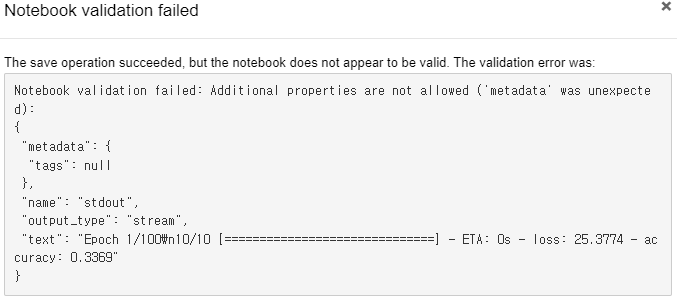

lms가 자꾸 메모리 때문에 커널이 죽어서 코랩으로 마저 했는데.. 이전 학습 부분이 날아갔어요ㅠㅠ 
코랩에서도 오류가 몇번 났었는데 그래서 그런지 
쉬지 않고 이런류의 오류가 뜹니다..ㅠㅠ 죄송합니다. 점수는 바라지 않으니 이런일이 있었구나만 알아주시면 감사하겠습니다.

In [20]:
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
callbacks = [TensorBoard(log_dir='./log'), ModelCheckpoint("segmentation.h5", save_best_only=True)]
history = model.fit(train_input_imgs, train_targets,
                    epochs=100,
                    callbacks=callbacks,
                    batch_size=16,
                    validation_data=(val_input_imgs, val_targets))

Epoch 1/100
10/10 [==============================] - ETA: 0s - loss: 25.3774 - accuracy: 0.3369

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


10/10 [==============================] - 108s 3s/step - loss: 25.3774 - accuracy: 0.3369 - val_loss: 1.7399 - val_accuracy: 0.2987
Epoch 2/100
10/10 [==============================] - 18s 2s/step - loss: 1.5882 - accuracy: 0.3910 - val_loss: 1.4629 - val_accuracy: 0.4500
Epoch 3/100
10/10 [==============================] - 18s 2s/step - loss: 1.4548 - accuracy: 0.4277 - val_loss: 1.4212 - val_accuracy: 0.4490
Epoch 4/100
10/10 [==============================] - 17s 2s/step - loss: 1.4297 - accuracy: 0.4283 - val_loss: 1.4234 - val_accuracy: 0.4490
Epoch 5/100
10/10 [==============================] - 18s 2s/step - loss: 1.4088 - accuracy: 0.4291 - val_loss: 1.4026 - val_accuracy: 0.4505
Epoch 6/100
10/10 [==============================] - 18s 2s/step - loss: 1.3794 - accuracy: 0.4300 - val_loss: 1.3720 - val_accuracy: 0.4532
Epoch 7/100
10/10 [==============================] - 18s 2s/step - loss: 1.3058 - accuracy: 0.4659 - val_loss: 1.2726 - val_accuracy: 0.4774
Epoch 8/100
10/10 [====

## 학습 결과 평가

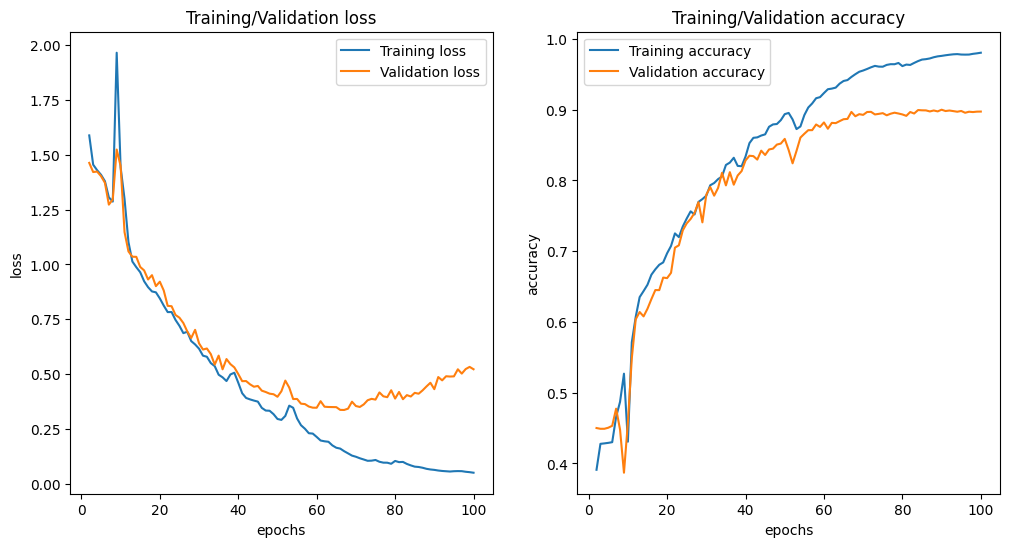

In [21]:
# 결과 시각화

epochs = range(1, len(history.history["loss"]) + 1)[1:]
loss = history.history["loss"][1:]
val_loss = history.history["val_loss"][1:]
acc = history.history["accuracy"][1:]
val_acc = history.history["val_accuracy"][1:]

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(epochs, loss, label="Training loss")
plt.plot(epochs, val_loss, label="Validation loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("Training/Validation loss")
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs, acc, label="Training accuracy")
plt.plot(epochs, val_acc, label="Validation accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("Training/Validation accuracy")
plt.legend()

In [22]:
from tensorflow.keras.models import load_model

model_path = 'segmentation.h5'

loaded_model = load_model(model_path)
loaded_model.evaluate(test_input_imgs, test_targets)


1/1 [==============================] - 28s 28s/step - loss: 0.3522 - accuracy: 0.8947


[0.3521580100059509, 0.8947188854217529]

In [30]:
prediction = loaded_model.predict(test_input_imgs)

1/1 [==============================] - 0s 51ms/step


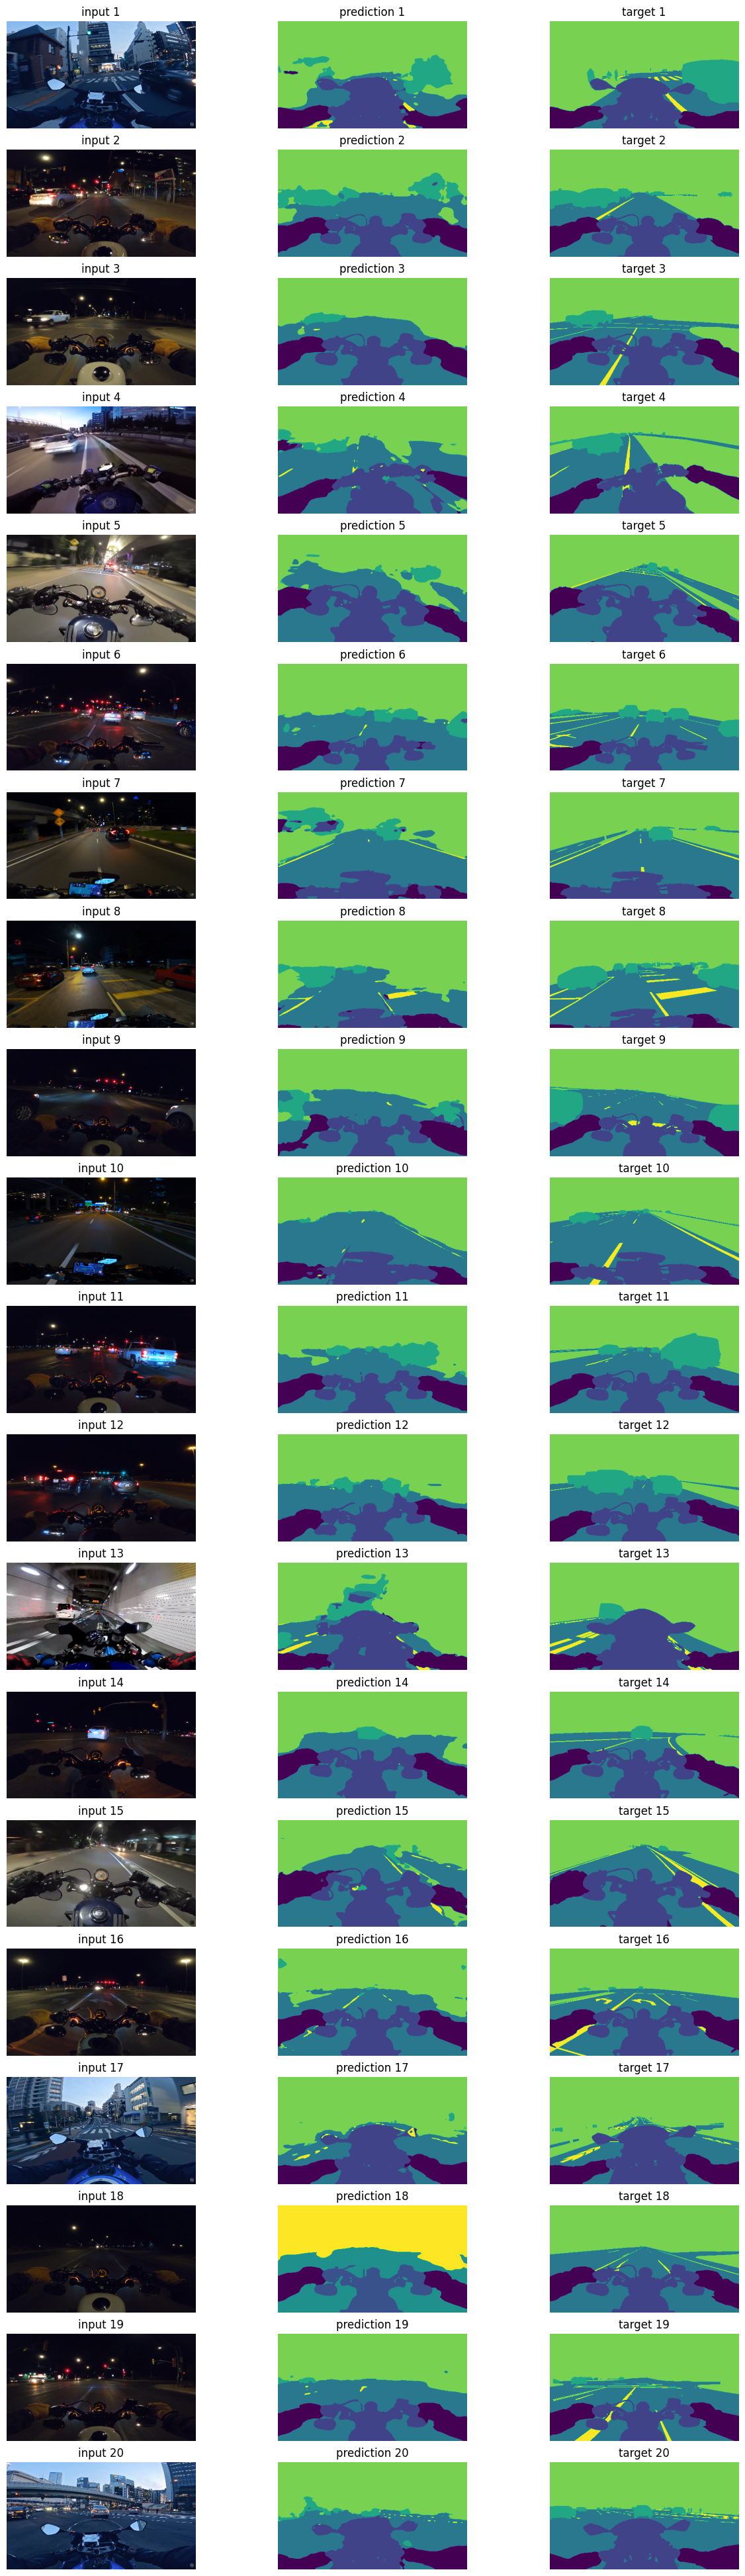

In [31]:
# 모델의 예측 결과 시각화

def convert_output(pred):
    out = np.argmax(pred, axis=-1)
    return out

plt.figure(figsize=(15,50))

for i in range(20):
    plt.subplot(20,3,3*i+1)
    plt.axis('off')
    plt.imshow(test_input_imgs[i]/255)
    plt.title(f'input {i+1}')

    plt.subplot(20,3,3*i+2)
    plt.axis('off')
    output = prediction[i]
    output_img = convert_output(output)
    plt.imshow(output_img)
    plt.title(f'prediction {i+1}')

    plt.subplot(20,3,3*i+3)
    plt.axis('off')
    plt.imshow(test_targets[i])
    plt.title(f'target {i+1}')

전반적으로 우수한 성능을 보이지만 부분부분 특히 prediction 18의 경우 배경을 완전히 잘못 잡고 있습니다.

회고 : 너무 당황스러운 상황들이 많이 발생했고, 시간도 너무 부족해서 발만 동동 구르며 했던 퀘스트였던 것 같다..
너무 속상해.. 스스로의 부족함을 많이 느꼈고.. 특히 증강 부분에서 많이 헤매서 증강 부분만 학습을 10번도 더한거 같다.
노드에서 배운 내용들을 적용하고 싶은데.. 어찌 적용해야 좋을지 몰라 폭풍 검색과 GPT와의 면담이 잦았던 프로젝트였다.